In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import cv2
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_annotation_path = '/kaggle/input/openforensics-data/Train_poly.json'
valid_annotation_path = '/kaggle/input/openforensics-data/Val_poly.json'
test_annotation_path = '/kaggle/input/openforensics-data/Test-Dev_poly.json'

with open(train_annotation_path, 'r') as file:
    train_annotation = json.load(file)
with open(valid_annotation_path, 'r') as file:
    valid_annotation = json.load(file)
with open(test_annotation_path, 'r') as file:
    test_annotation = json.load(file)

# Train Data

In [3]:
train_images_df = pd.DataFrame(train_annotation['images'])
train_images_df.rename(columns={'file_name': 'file_path'}, inplace=True)
train_images_df['file_name'] = train_images_df['file_path'].str.split('/').str[-1]
train_images_df.head()

,id,file_path,width,height,file_name
0,0,Images/Train/9c541c578f.jpg,1024,847,9c541c578f.jpg
1,1,Images/Train/e44ef213aa.jpg,1024,683,e44ef213aa.jpg
2,2,Images/Train/8ded94d4df.jpg,1024,768,8ded94d4df.jpg
3,3,Images/Train/85ce8a2508.jpg,768,1024,85ce8a2508.jpg
4,4,Images/Train/273ee16b8d.jpg,683,1024,273ee16b8d.jpg


In [4]:
train_annotation_df = pd.DataFrame(train_annotation['annotations']).drop('id', axis=1)
train_annotation_df.head()

,image_id,iscrowd,area,category_id,bbox,segmentation
0,0,0,13661,1,"[458, 237, 134, 131]","[[496, 237, 488, 238, 483, 241, 481, 241, 475,..."
1,1,0,9619,1,"[380, 229, 111, 118]","[[412, 229, 407, 230, 403, 231, 398, 232, 393,..."
2,1,0,9707,1,"[596, 235, 107, 115]","[[612, 235, 608, 236, 606, 237, 600, 243, 599,..."
3,2,0,25865,1,"[527, 195, 170, 187]","[[609, 195, 579, 196, 549, 197, 532, 198, 530,..."
4,3,0,55439,1,"[235, 250, 246, 279]","[[298, 250, 293, 251, 287, 252, 284, 253, 282,..."


In [5]:
train_images_df.shape, train_annotation_df.shape

((44097, 5), (150866, 6))

# Validation Data

In [6]:
valid_images_df = pd.DataFrame(valid_annotation['images'])
valid_images_df.rename(columns={'file_name': 'file_path'}, inplace=True)
valid_images_df['file_name'] = valid_images_df['file_path'].str.split('/').str[-1]
valid_images_df.head()

,id,file_path,width,height,file_name
0,0,Images/Val/0793f07ea0.jpg,1024,681,0793f07ea0.jpg
1,1,Images/Val/a51f348114.jpg,683,1024,a51f348114.jpg
2,2,Images/Val/5db3840e35.jpg,1024,680,5db3840e35.jpg
3,3,Images/Val/16fcd4f7ea.jpg,1024,887,16fcd4f7ea.jpg
4,4,Images/Val/e0faf5063c.jpg,815,1024,e0faf5063c.jpg


In [7]:
valid_annotation_df = pd.DataFrame(valid_annotation['annotations']).drop('id', axis=1)
valid_annotation_df.head()

,image_id,iscrowd,area,category_id,bbox,segmentation
0,0,0,16812,1,"[192, 236, 162, 133]","[[237, 236, 232, 237, 226, 238, 218, 242, 216,..."
1,0,0,35192,1,"[497, 210, 208, 211]","[[613, 210, 571, 211, 533, 212, 512, 213, 506,..."
2,1,0,22184,1,"[212, 294, 174, 180]","[[318, 294, 314, 295, 311, 296, 307, 298, 305,..."
3,1,0,23288,1,"[204, 288, 183, 185]","[[322, 288, 319, 289, 311, 293, 309, 295, 306,..."
4,2,0,31820,1,"[203, 301, 186, 218]","[[353, 301, 343, 302, 334, 303, 324, 304, 314,..."


# Test Data

In [8]:
test_images_df = pd.DataFrame(test_annotation['images'])
test_images_df.rename(columns={'file_name': 'file_path'}, inplace=True)
test_images_df['file_name'] = test_images_df['file_path'].str.split('/').str[-1]
test_images_df.head()

,id,file_path,width,height,file_name
0,0,Images/Test-Dev/e8ef73c50c.jpg,1024,683,e8ef73c50c.jpg
1,1,Images/Test-Dev/f37e15d108.jpg,681,1024,f37e15d108.jpg
2,2,Images/Test-Dev/5f121a747b.jpg,683,1024,5f121a747b.jpg
3,3,Images/Test-Dev/9882a7d944.jpg,1024,640,9882a7d944.jpg
4,4,Images/Test-Dev/c8d981b514.jpg,683,1024,c8d981b514.jpg


In [9]:
test_annotation_df = pd.DataFrame(test_annotation['annotations']).drop('id', axis=1)
test_annotation_df.head()

,image_id,iscrowd,area,category_id,bbox,segmentation
0,0,0,11744,1,"[209, 280, 124, 122]","[[232, 280, 227, 281, 225, 282, 223, 284, 220,..."
1,0,0,11582,1,"[446, 335, 125, 116]","[[478, 335, 472, 336, 452, 346, 446, 352, 446,..."
2,0,0,12437,1,"[706, 203, 125, 134]","[[800, 203, 794, 204, 787, 205, 781, 206, 774,..."
3,1,0,146846,1,"[232, 483, 417, 433]","[[559, 483, 542, 484, 537, 486, 528, 485, 525,..."
4,2,0,97352,1,"[223, 385, 340, 380]","[[326, 385, 288, 386, 279, 387, 278, 388, 268,..."


In [10]:
import os

def remove_all_files(directory):
    # Check if directory exists
    if not os.path.exists(directory):
        print(f"The directory {directory} does not exist.")
        return
    
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if it’s a file before removing
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Removed file: {file_path}")
        else:
            print(f"Skipped non-file item: {file_path}")

# Usage example
remove_all_files("/kaggle/working/Train/Train/Real")
remove_all_files("/kaggle/working/Train/Train/Fake")

The directory /kaggle/working/Train/Train/Real does not exist.
The directory /kaggle/working/Train/Train/Fake does not exist.


# Prepare Folders

`Train`, `Val`, and `Test` contain all cropped train, validation, and test images. Each image only contains 1 face.

In [11]:
# Create directories for real and fake faces
os.makedirs('Train/Train/Real', exist_ok=True)
os.makedirs('Train/Train/Fake', exist_ok=True)

os.makedirs('Val/Val/Real', exist_ok=True)
os.makedirs('Val/Val/Fake', exist_ok=True)

os.makedirs('Test/Test/Real', exist_ok=True)
os.makedirs('Test/Test/Fake', exist_ok=True)

# Crop and Save Images

Train data has 150866 faces.

In [12]:
output_base_dir = 'Train/Train'

# Initialize tqdm for progress display
for part_num in range(1, 6):
    with tqdm(total=len(train_annotation_df), desc=f"Cropping Train Part {part_num}", unit="image") as progress_bar:
        for i, row in train_annotation_df.iterrows():
            # Get the corresponding image file from the images_df
            img_id = row['image_id']
            img_row = train_images_df.loc[train_images_df['id'] == img_id]
            
            if img_row.empty:
                continue
    
            img_filename = img_row.iloc[0]['file_name']
            img_path = os.path.join(f'/kaggle/input/openforensics-data/Train_part_{part_num}/Train', img_filename)

            # Skip if image path is not found
            if not os.path.exists(img_path):
                continue
            
            # Read the image and convert to RGB, skip if image is not found
            img = cv2.imread(img_path)
            if img is None:
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            # Crop the face based on the bounding box [x, y, width, height]
            x, y, w, h = row['bbox']
            cropped_face = img_rgb[y:y + h, x:x + w]
            cropped_face = cv2.resize(cropped_face, (224, 224)) 
    
            # Assign the category / class: 0 is Real, 1 is Fake
            category_id = row['category_id']
            category_name = 'Real' if category_id == 0 else 'Fake'
            output_dir = os.path.join(output_base_dir, category_name)
            os.makedirs(output_dir, exist_ok=True)
    
            # Generate a filename and save the cropped face
            cropped_face_path = os.path.join(output_dir, f"{img_filename}_face_{i}.jpg")
            cv2.imwrite(cropped_face_path, cv2.cvtColor(cropped_face, cv2.COLOR_RGB2BGR))
    
            # Update the progress bar
            progress_bar.update(1)

Cropping Train Part 5:  10%|▉         | 14976/150866 [06:40<1:00:29, 37.44image/s]


In [13]:
output_base_dir = 'Val/Val'
with tqdm(total=len(valid_annotation_df), desc=f"Cropping Val", unit="image") as progress_bar:
    for i, row in valid_annotation_df.iterrows():
        # Get the corresponding image file from the images_df
        img_id = row['image_id']
        img_row = valid_images_df.loc[valid_images_df['id'] == img_id]
            
        if img_row.empty:
            continue
    
        img_filename = img_row.iloc[0]['file_name']
        img_path = os.path.join(f'/kaggle/input/openforensics-data/Val/Val', img_filename)

        # Skip if image path is not found
        if not os.path.exists(img_path):
            continue
        
        # Read the image and convert to RGB, skip if image is not found
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
        # Crop the face based on the bounding box [x, y, width, height]
        x, y, w, h = row['bbox']
        cropped_face = img_rgb[y:y + h, x:x + w]
        cropped_face = cv2.resize(cropped_face, (224, 224)) 
    
        # Assign the category / class: 0 is Real, 1 is Fake
        category_id = row['category_id']
        category_name = 'Real' if category_id == 0 else 'Fake'
        output_dir = os.path.join(output_base_dir, category_name)
        os.makedirs(output_dir, exist_ok=True)
    
        # Generate a filename and save the cropped face
        cropped_face_path = os.path.join(output_dir, f"{img_filename}_face_{i}.jpg")
        cv2.imwrite(cropped_face_path, cv2.cvtColor(cropped_face, cv2.COLOR_RGB2BGR))
    
        # Update the progress bar
        progress_bar.update(1)

Cropping Val: 100%|██████████| 15345/15345 [05:02<00:00, 50.67image/s]


In [14]:
output_base_dir = 'Test/Test'

# Initialize tqdm for progress display
for part_num in range(1, 3):
    with tqdm(total=len(test_annotation_df), desc=f"Cropping Test Part {part_num}", unit="image") as progress_bar:
        for i, row in test_annotation_df.iterrows():
            # Get the corresponding image file from the images_df
            img_id = row['image_id']
            img_row = test_images_df.loc[test_images_df['id'] == img_id]
            
            if img_row.empty:
                continue
    
            img_filename = img_row.iloc[0]['file_name']
            img_path = os.path.join(f'/kaggle/input/openforensics-data/Test-Dev_part_{part_num}/Test-Dev', img_filename)

            # Skip if image path is not found
            if not os.path.exists(img_path):
                continue
            
            # Read the image and convert to RGB, skip if image is not found
            img = cv2.imread(img_path)
            if img is None:
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            # Crop the face based on the bounding box [x, y, width, height]
            x, y, w, h = row['bbox']
            cropped_face = img_rgb[y:y + h, x:x + w]
            cropped_face = cv2.resize(cropped_face, (224, 224)) 
    
            # Assign the category / class: 0 is Real, 1 is Fake
            category_id = row['category_id']
            category_name = 'Real' if category_id == 0 else 'Fake'
            output_dir = os.path.join(output_base_dir, category_name)
            os.makedirs(output_dir, exist_ok=True)
    
            # Generate a filename and save the cropped face
            cropped_face_path = os.path.join(output_dir, f"{img_filename}_face_{i}.jpg")
            cv2.imwrite(cropped_face_path, cv2.cvtColor(cropped_face, cv2.COLOR_RGB2BGR))
    
            # Update the progress bar
            progress_bar.update(1)

Cropping Test Part 2:  47%|████▋     | 23320/49718 [07:44<08:46, 50.15image/s]


In [15]:
import shutil
shutil.make_archive('train_cropped_faces_224_rgb', 'zip', '/kaggle/working/Train')
shutil.make_archive('val_cropped_faces_224_rgb', 'zip', '/kaggle/working/Val')
shutil.make_archive('test_cropped_faces_224_rgb', 'zip', '/kaggle/working/Test')

'/kaggle/working/test_cropped_faces_224_rgb.zip'

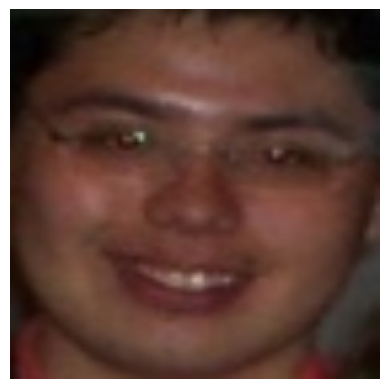

In [16]:
train_real_dir = '/kaggle/working/Train/Train/Real'
sample_cropped_img = cv2.imread(os.path.join(train_real_dir, os.listdir(train_real_dir)[111]))
plt.imshow(cv2.cvtColor(sample_cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()